## Using K-Means algorithms to cluster the Iris dataset
- Họ và Tên: Nguyễn Tấn Xanh 
- MSHV: 2470114

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('Iris.csv')

In [3]:
dataset.shape

(150, 6)

In [4]:
X_iris = dataset.iloc[:, 1:5].values
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
X_iris .shape

(150, 4)

## 1) Find the optimal number of clusters using Elbow Method

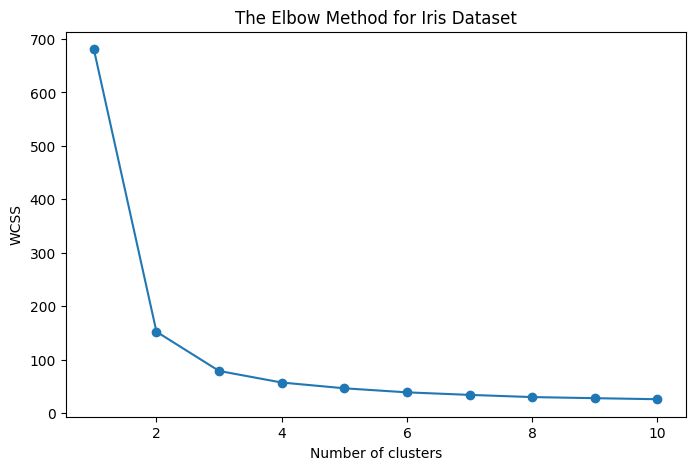

In [7]:
wcss_iris = []

for i in range(1, 11):
    kmeans_iris = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_iris.fit(X_iris)
    wcss_iris.append(kmeans_iris.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_iris, marker='o')
plt.title('The Elbow Method for Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### From the graph above we choose `n_clusters = 3`

## 2) Using K-Means

In [8]:
kmeans_iris_final = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_iris = kmeans_iris_final.fit_predict(X_iris)
y_kmeans_iris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [9]:
kmeans_iris_final.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## 3) Visualizing the clusters

In [10]:
y_kmeans_iris.shape

(150,)

In [11]:
X_iris.shape

(150, 4)

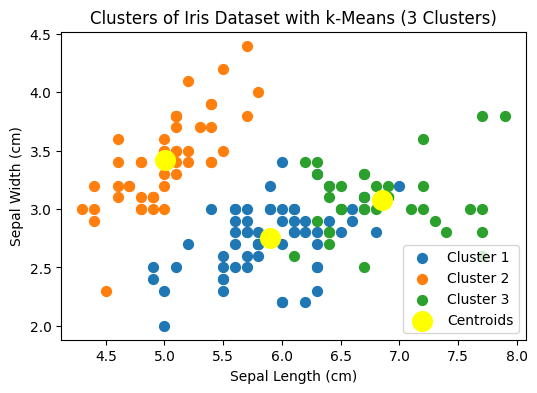

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(X_iris[y_kmeans_iris == 0, 0], X_iris[y_kmeans_iris == 0, 1], s=50, label='Cluster 1')
plt.scatter(X_iris[y_kmeans_iris == 1, 0], X_iris[y_kmeans_iris == 1, 1], s=50, label='Cluster 2')
plt.scatter(X_iris[y_kmeans_iris == 2, 0], X_iris[y_kmeans_iris == 2, 1], s=50, label='Cluster 3')

# Marking centroids
plt.scatter(kmeans_iris_final.cluster_centers_[:, 0], kmeans_iris_final.cluster_centers_[:, 1], 
            s=200, c='yellow', label='Centroids')

plt.title('Clusters of Iris Dataset with k-Means (3 Clusters)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

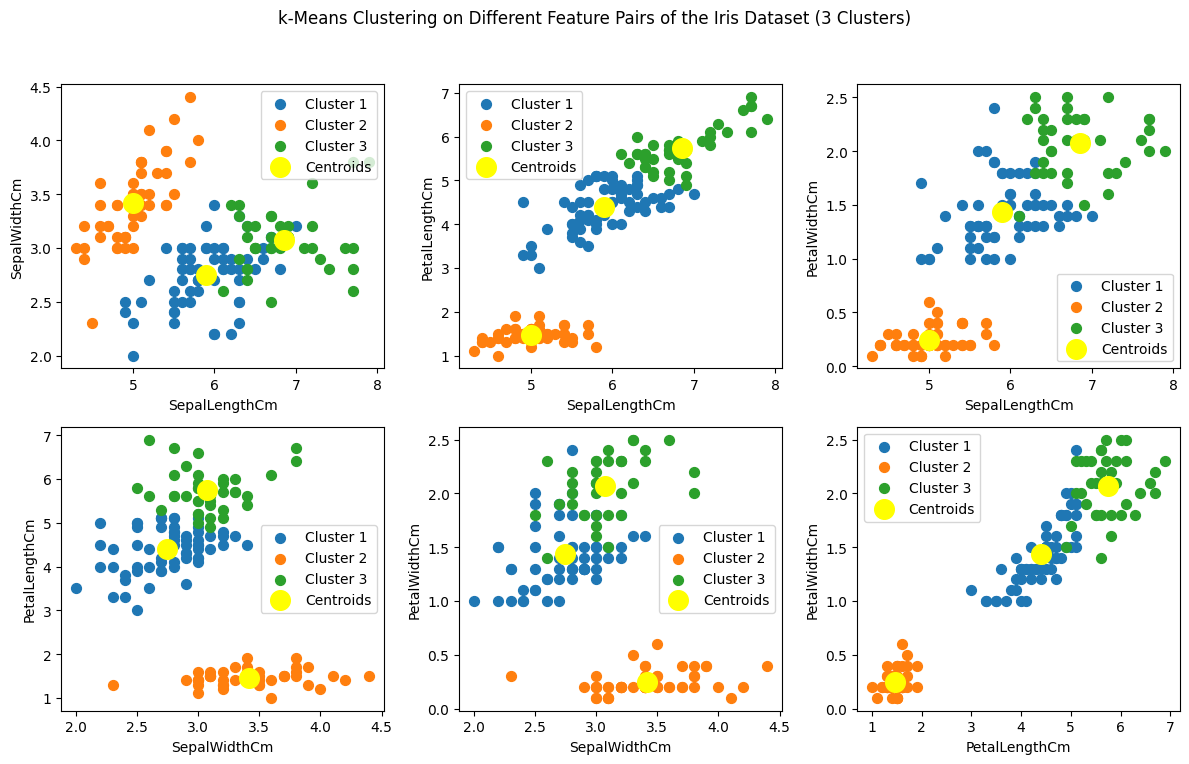

In [13]:
feature_pairs_iris = [
    (0, 1),  # Sepal Length vs Sepal Width
    (0, 2),  # Sepal Length vs Petal Length
    (0, 3),  # Sepal Length vs Petal Width
    (1, 2),  # Sepal Width vs Petal Length
    (1, 3),  # Sepal Width vs Petal Width
    (2, 3)   # Petal Length vs Petal Width
]

plt.figure(figsize=(12, 8))
for idx, (i, j) in enumerate(feature_pairs_iris, 1):
    plt.subplot(2, 3, idx)
    plt.scatter(X_iris[y_kmeans_iris == 0, i], X_iris[y_kmeans_iris == 0, j], s=50, label='Cluster 1')
    plt.scatter(X_iris[y_kmeans_iris == 1, i], X_iris[y_kmeans_iris == 1, j], s=50, label='Cluster 2')
    plt.scatter(X_iris[y_kmeans_iris == 2, i], X_iris[y_kmeans_iris == 2, j], s=50, label='Cluster 3')
    plt.scatter(kmeans_iris_final.cluster_centers_[:, i], kmeans_iris_final.cluster_centers_[:, j], 
                s=200, c='yellow', label='Centroids')
    plt.xlabel(dataset.columns[i + 1])
    plt.ylabel(dataset.columns[j + 1])
    plt.legend()

plt.suptitle('k-Means Clustering on Different Feature Pairs of the Iris Dataset (3 Clusters)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 4)  Clustering with non-optimal number of clusters

In [14]:
kmeans_iris_final = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_iris = kmeans_iris_final.fit_predict(X_iris)
y_kmeans_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

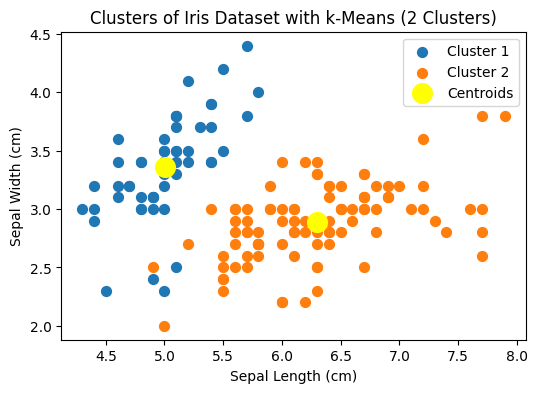

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(X_iris[y_kmeans_iris == 0, 0], X_iris[y_kmeans_iris == 0, 1], s=50, label='Cluster 1')
plt.scatter(X_iris[y_kmeans_iris == 1, 0], X_iris[y_kmeans_iris == 1, 1], s=50, label='Cluster 2')

# Marking centroids
plt.scatter(kmeans_iris_final.cluster_centers_[:, 0], kmeans_iris_final.cluster_centers_[:, 1], 
            s=200, c='yellow', label='Centroids')

plt.title('Clusters of Iris Dataset with k-Means (2 Clusters)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

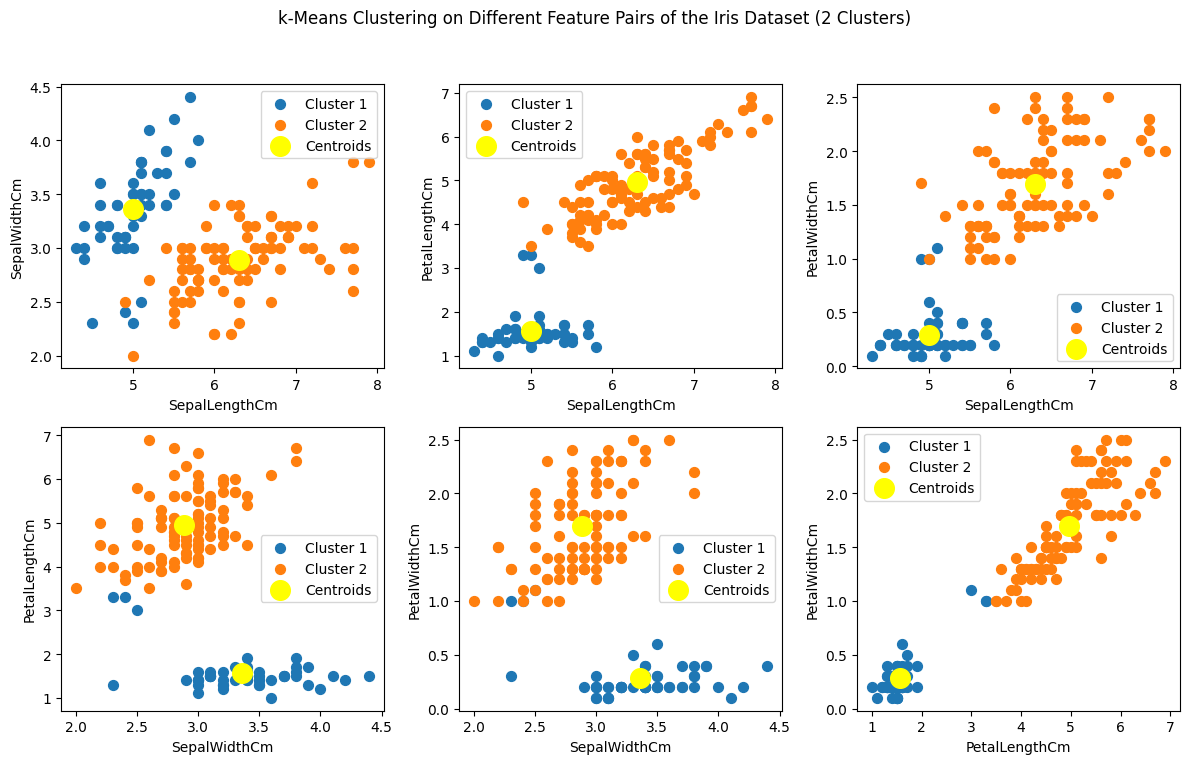

In [16]:
feature_pairs_iris = [
    (0, 1),  # Sepal Length vs Sepal Width
    (0, 2),  # Sepal Length vs Petal Length
    (0, 3),  # Sepal Length vs Petal Width
    (1, 2),  # Sepal Width vs Petal Length
    (1, 3),  # Sepal Width vs Petal Width
    (2, 3)   # Petal Length vs Petal Width
]

plt.figure(figsize=(12, 8))
for idx, (i, j) in enumerate(feature_pairs_iris, 1):
    plt.subplot(2, 3, idx)
    plt.scatter(X_iris[y_kmeans_iris == 0, i], X_iris[y_kmeans_iris == 0, j], s=50, label='Cluster 1')
    plt.scatter(X_iris[y_kmeans_iris == 1, i], X_iris[y_kmeans_iris == 1, j], s=50, label='Cluster 2')
    plt.scatter(kmeans_iris_final.cluster_centers_[:, i], kmeans_iris_final.cluster_centers_[:, j], 
                s=200, c='yellow', label='Centroids')
    plt.xlabel(dataset.columns[i + 1])
    plt.ylabel(dataset.columns[j + 1])
    plt.legend()

plt.suptitle('k-Means Clustering on Different Feature Pairs of the Iris Dataset (2 Clusters)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()